###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth, I. Hawke. Partly based on content by David Ketcheson, also under CC-BY.

# Общая модель фугоида

Это третий блокнот, посвященный _фугоидной модели движения планера_, первого учебного модуля русской версии курса  [**"Practical Numerical Methods with Python."**](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about). В первом ноутбуке были описаны физические аспекты колебательных траекторий, известных как _фугоиды_, которые являются результатом перераспределения эненргии между ее кинетической и потенциальной формами при полете летательного аппарата без сопротивления. В том же ноутбуке был написан аккуратный код, который позволяет отрисовать разнообразные фугоидные кривые.

Во втором ноутбуке мы детальнее изучили систему уравнений, описывающую малые колебания относительно прямолинейного фугоида, сводящиеся к гармоническим колебаниям. Это система обыкновенных дифференциальных уравнений второго порядка, которую мы решили при помощи простейшего численного метода — **метода Эйлера**. Мы узнали про сходимость метода и определили ошибку численного метода, сравнив численное решение с аналитическим. Неплохой задел!

Теперь давайте вернемся к первоначальной динамической модели движения и избавимся от упрощения, заключающегося в отсутствии сопротивления. Вспомним, какие силы действуют на летательный аппарат, движущийся (возможно с ускорением) по мгновенной трактории, направленной вверх. Угол наклона траектории обозначим $\theta$, направление "против часовой стрелки" будем считать положительным.

![Image](./figures/glider_forces-lesson3.png)
#### Рисунок 1. Силы, действующие на летательный аппарат и положительное направление угла наклона траектории.

На Рисунке 1 подъемная сила обозначена как $L$, вес как $W$, лобовое сопротивление как $D$, а положительный угол наклона траектории как $\theta$.

На первом занятии мы записывали баланс сил в касательном и перпендикулярном направлениях к траектории движнния планера, находящегося в _равновесии_. В случае же, когда силы, действующие на летательный аппарат, не уравновешивают друг друга, согласно второму закону Ньютона, можно записать:

\begin{align}
m \frac{dv}{dt} & = - W \sin\theta - D \\
m v \, \frac{d\theta}{dt} & = - W \cos\theta + L
\end{align}

Проведем несколько косметических преобразований. Обозначим производные с помощью штрихов и разделим обе части системы на вес самолета:

\begin{align}
 \frac{v'}{g} & = - \sin\theta - D/W \\
\frac{v}{g} \, \theta' & = - \cos\theta + L/W
\end{align}

Воспользуемся выражением для отношения подъемной силы и веса планера, выведенным на первом занятии — $L/W=v^2/v_t^2$. Кроме того, из определения выражений для подъемной силы и сопротивления 

$$\begin{eqnarray}
L &=& C_L S \times \frac{1}{2} \rho v^2 \\
D &=& C_D S \times \frac{1}{2} \rho v^2
\end{eqnarray}$$

следует, что $L/D=C_L/C_D$. С учетом этих соотношений исходная система может быть переписана в виде

\begin{align}
 v' & = - g\, \sin\theta - \frac{C_D}{C_L} \frac{g}{v_t^2} v^2 \\
 \theta' & = - \frac{g}{v}\,\cos\theta + \frac{g}{v_t^2}\, v
\end{align}

Стоит отметить, что первое уравнение системы содержит множитель $C_D/C_L$, который является величиной, обратной аэродинамическому качеству летательного аппарата. Оказывается, этот член уравнения привносит демпфирование в модель фугоидного движения. Если трение отсутствует ($C_D/C_L = 0$), то нет и демпфирования. В реальных условиях трение всегда отлично от нуля, но по мере совершенствования летательных аппаратов фугоидные колебания становятся все менее затухающими. При полете на высоте это практически не важно, однако, вертикальные колебания летательного аппарата при посадке могут оказаться весьма опасными, на них следует обращать особое внимание. 

## Задача Коши

Для того, чтобы визуализировать траектории движения, полученные в рамках описанной модели, нужно проинтегрировать уравнения для пространственных координат, которые зависят от продольной скорости (касательной к траеткории) и угла наклона траектории. Положение планера в вертикальной плоскости в выбранной системе координат описывается координатами $(x, y)$, которые можно получить из уравнений:

\begin{align}
x'(t) & = v \cos(\theta) \\
y'(t) & = v \sin(\theta).
\end{align}

Добавив эти два уравнения к исходной системе, получим систему из четырех ОДУ первого порядка. Для ее решения, как и на прошлом занятии, воспользуемся процедурой марша по времени. Для этого нам нужны *начальные значения* для каждой переменной:

$$
v(0) = v_0 \quad \text{и} \quad \theta(0) = \theta_0\\
x(0) = x_0 \quad \text{и} \quad y(0) = y_0
$$


## Решение при помощи метода Эйлера

Как применить к полученной системе метод Эйлера, нам известно из прошлого занятия. Заменим производные аппроксимациями в виде:

$$v'(t) \approx \frac{v^{n+1} - v^n}{\Delta t},$$

где индекс $n$ используется для обозначения $n$-го значения итерации по времени. Например, для первого уравнения системы имеем:

$$\frac{v^{n+1} - v^n}{\Delta t} = - g\, \sin\theta^n - \frac{C_D}{C_L} \frac{g}{v_t^2} (v^n)^2$$

Ну а дальше все по накатанной. На каждом шаге по времени $t^n$ нужно вычислить все известные параметры системы для того, чтобы получить решение на $t^{n+1}$-м, следующем шаге по времени. Эта процедура называется _шагами по времени_ или _маршем по времени_.

Вся система уравнений в дискретном виде выглядит следующим образом:

\begin{align}
v^{n+1} & = v^n + \Delta t \left(- g\, \sin\theta^n - \frac{C_D}{C_L} \frac{g}{v_t^2} (v^n)^2 \right) \\
\theta^{n+1} & = \theta^n + \Delta t \left(- \frac{g}{v^n}\,\cos\theta^n + \frac{g}{v_t^2}\, v^n \right) \\
x^{n+1} & = x^n + \Delta t \, v^n \cos\theta^n \\
y^{n+1} & = y^n + \Delta t \, v^n \sin\theta^n.
\end{align}

Как нам уже известно, систему ОДУ можно записать в векторном виде:

$$u'(t) = f(u),$$

где

\begin{align}
u & = \begin{pmatrix} v \\ \theta \\ x \\ y \end{pmatrix} & f(u) & = \begin{pmatrix} - g\, \sin\theta - \frac{C_D}{C_L} \frac{g}{v_t^2} v^2 \\ - \frac{g}{v}\,\cos\theta + \frac{g}{v_t^2}\, v \\ v\cos\theta \\ v\sin\theta \end{pmatrix}.
\end{align}


Реализовать решение при помощи массива NumPy, в котором будут храниться все независимые переменные не вполне тривиальная задача. Но если все же выбрать такой путь, то функция для шага по методу Эйлера может быть записана в виде, который позволяет получить решения для произвольного числа уравнений в системе. Шаг по времени реализуется при помощи одной и той же строчки кода:

```Python
def euler_step(u, f, dt):
    return u + dt * f(u)
```

Приведенная функция в качестве одного из аргументов принимает NumPy-массив  `u` с произвольной длины. Все что нужно для корректной работы алгоритма — создать соответствующую функцию правой части `f(u)`. Обратите внммание, что в списке передаваемых аргументов для функции `euler_step()` присутсвует _функция_.

### Решаем!

Как обычно, все начинается с загрузки модулей и библиотек,  необходимых для решения задачи. Для исследования сходимости нам понадобятся некоторые трансцедентные функции, в том числе $\log$. Напоминаю, что строчка `%matplotlib inline` — это магическая функция, которая сообщает Matplotlib о нашем желании видеть результат отисовки графиков прямо в блокноте (по умолчанию, для этого создается отдельное окно). Помимо прочего, мы импотритуем модуль `rcParams` для определения глобальных настроек рисования: гарнитуры и размера шрифтов. Поехали!

In [1]:
from math import sin, cos, log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Далее, нужно задать параметры модели и _начальные условия_ для численного решения. С ускорением свободного падения все просто, это 9.8 м/с$^2$, но какое значение задавать для аэодинамического качества? Можно выбрать что-нибудь подходящее из таблицы в Википедии [Аэродинамическое качество](https://ru.wikipedia.org/wiki/%D0%90%D1%8D%D1%80%D0%BE%D0%B4%D0%B8%D0%BD%D0%B0%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%BE): современный планер может обладать качеством от 40 до 60, в зависимости от размаха крыла (а, например, у белки-летяги качество примерно 2).

Что касается _триммерной скорости_, крейсерская скорость современного планера варьируется в пределаз от 65 до 280 км/ч, по информации из той же Википедии. В единицах СИ это будет от 18 до 78 м/с. Выберем что-нибудь посередине.

Ниже приведен возможный набор параметров, подходящий для моделирования. На досуге поменяйте некоторые из них и посмотрите, что получится.

In [2]:
# model parameters:
g = 9.8      # gravity in m s^{-2}
v_t = 30.0   # trim velocity in m s^{-1}   
C_D = 1/40  # drag coefficient --- or D/L if C_L=1
C_L = 1   # for convenience, use C_L = 1

### set initial conditions ###
v0 = v_t     # start at the trim velocity (or add a delta)
theta0 = 0 # initial angle of trajectory
x0 = 0     # horizotal position is arbitrary
y0 = 1000  # initial altitude

Определим функцию `f()` правой части уравнения (15) — векторной записи нашей системы уравнений. Предполагается, что значения параметов модели заданы. То есть выполнения верхней ячейки с новыми значениями параметров, достаточно для того, чтобы получить ноыве значения правой части, и переопределять функцию `f()` заново не нужно.

In [3]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    v = u[0]
    theta = u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*sin(theta) - C_D/C_L*g/v_t**2*v**2,
                      -g*cos(theta)/v + g/v_t**2*v,
                      v*cos(theta),
                      v*sin(theta)])

Сравните опреление функции в коде с формулой для `f()` из дифференциального уравнения и убедитесь, что нет опечаток!

\begin{align}
u & = \begin{pmatrix} v \\ \theta \\ x \\ y \end{pmatrix} & f(u) & = \begin{pmatrix} - g\, \sin\theta - \frac{C_D}{C_L} \frac{g}{v_t^2} v^2 \\ - \frac{g}{v}\,\cos\theta + \frac{g}{v_t^2}\, v \\ v\cos\theta \\ v\sin\theta \end{pmatrix} \nonumber
\end{align}

Теперь все готово для реализации метода Эйлера в самом простом виде, назовем эту функцию `euler_step()`:

In [5]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equations.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

Определив конечный момент времени и шаг $\Delta t$, мы можем построить расчетную сетку при помощи функции [`linspace()`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) из библиотеки NumPy. Убедитесь, что вы разобрались с теми особенностями, которые возникают при генерации расчетной сетки: например, зачем нужно добавлять 1 при определении числа шагов по времени `N`?

Посмотрите на код в следующей ячейке и убедитесь, что вы понимаете перечисленные ниже особенности:

* Массив `u` содержит решение на каждом шаге по времени, которое орисывается четырьмя переменными: скоростью, углом траектории и координатами планера.
* Первый элемент массива `u` задается исходя из начальных условий задачи.
* На каждом шаге цикла `for` для получения решения на временном слое $n+1$ вызвается функция `euler_step()`.

In [6]:
T = 100                          # final time
dt = 0.1                           # time increment
N = int(T/dt) + 1                  # number of time-steps
t = numpy.linspace(0, T, N)      # time discretization

# initialize the array containing the solution for each time-step
u = numpy.empty((N, 4))
u[0] = numpy.array([v0, theta0, x0, y0])# fill 1st element with initial values

# time loop - Euler method
for n in range(N-1):
    
    u[n+1] = euler_step(u[n], f, dt)

## Рисуем траекторию

Для того чтобы нарисовать траекторию планера, нам потребуются его координаты (`x`, `y`), упорядоченные по времени. Эта информация уже содержится в массиве с численным решением, нужно только ее оттуда выудить.

Убедитесь, что вы понимаете, что происходит с индексацией массива `u` ниже. При необходимости, обратитесь к справке [Indexing](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html).

In [7]:
# get the glider's position with respect to the time
x = u[:,2]
y = u[:,3]

Пора нарисовать траекторию и опрелить пройденное планером расстояние.

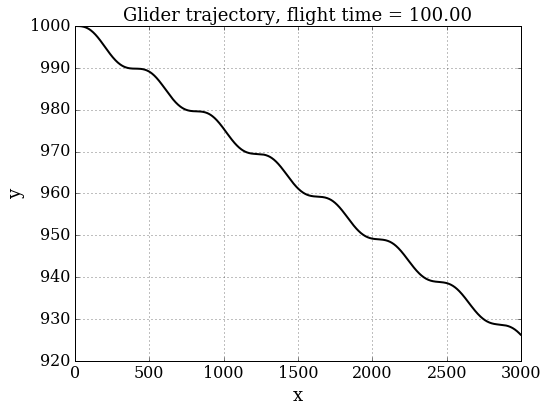

In [8]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Glider trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);

## Сходимость по сетке

Исследуем сходимость метода Эйлера преминительно к модели фугоида. На предыдущем занятии, когда рассматривалось движение по  прямолинейному фугоиду под действием малого возмущения, мы исследовали сходимость, сравнивая полученное численное решение с точным. К сожалению, большинство задач не имеют точного аналитического решения (имменно поэтому мы и занимаемся численными методами). Приятная обстоятельство: для изучения сходимости метода вместо аналитического решения можно использовать численные решения, полученные на сетках различной мощности.

В этом случае, надо признать, нужна уверенность, что решение на подробной сетке  описывает все особенность математической модели. Попробуем разобраться, как это сделать.

Для начала нужно получить последовательность решений одной и той же задачи на секах с различным количеством точек. 

Создадим масссив NumPy с именем `dt_values`, который будет содержать шаги по времени для каждой сетки, на которой будет вестись расчет. Для каждого элемента `dt_values[i]` методом Эйлера получим решение `u_values[i]`. Каждое решение в свою очередь является массивом, то есть `u_values` — массив, содержащий массивы. 

Для того чтобы заполнить этот массив, у нас в рукаве припрятан козырь: `enumerate()`. Чтобы получить решения — каждое с собственным шагом по времени $\Delta t$ — нужно пройтись в цикле по значениям `dt_values`. При этом необходимо иметь доступ как к самому значению `dt_values[i]` так и к индексу `i`. Как раз для этих целей и предназначена встроенная функция `enumerate()`, котора гененрирует пары `(индекс, значение)` для любой итерируемой последовательности.

Внимательно изучите код, приведенный ниже. Напоминаю, что справку по любой функции можно получить, если поставить перед ней вопросительный знак, например, `?numpy.empty_like`.

In [9]:
dt_values = numpy.array([0.1, 0.05, 0.01, 0.005, 0.001])

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray)

for i, dt in enumerate(dt_values):
    
    N = int(T/dt) + 1    # number of time-steps
    
    ### discretize the time t ###
    t = numpy.linspace(0.0, T, N)
    
    # initialize the array containing the solution for each time-step
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])

    # time loop
    for n in range(N-1):
       
        u[n+1] = euler_step(u[n], f, dt)   ### call euler_step() ###
    
    # store the value of u related to one grid
    u_values[i] = u

Для каждого решения вычислим разницу между ним и решением на подробной сетке. Эту разницу так и тянет назвать "_ошибкой_", но это не вполне корректно: решение на подробной сетке _не является точным_, оно просто берется за основу для оценки сходимости метода по сетке. 

Для вычисления разницы между текущим решением `u_current`и решением на подробной сетке `u_finest`, как и прежде, будем использовать норму $L_1$.

Тут возникает проблема. Самая грубая сетка, для которой $\Delta t = 0.1$, содержит 1001 точку, а подробная, для которой $\Delta t = 0.001$, — 100001 точку. Как определить, какие точки в этих сетках соответствуют одним и тем же моментам времени в разных решениях?

Если, например, имеются сетки с 10 и 100 шагами, это сделать довольно просто. Кажая ячейка 10-шаговой сетки равна по величине десяти ячейкам 100-шаговой.

Если известно _отношение_ размеров ячеек для двух сеток, то можно определиь, сколько ячеек подробной сетки заключено в одной ячейке грубой сетки.

Вспомним, что из массива NumPy можно выделить _срез_ — подмножество его элементов. Для выдеоения среза используется следующий синтаксис:

```Python
my_array[3:8]
```

У срезов есть одна крутая особенность, можно указывать "шаг среза". Если добавить дополнительное двоеточие `:` к диапазону среза, то можно напрямую указать, с каким шагом нужно выбирать элементы. Например, такой код

```Python
my_array[3:8:2]
```

выдаст значения `my_array[3]`, `my_array[5]` и `my_array[7]`

Используя этот инструментарий, можно получить разности решений на грубой и подробной сетках. Поехали!

In [10]:
def get_diffgrid(u_current, u_fine, dt):
    """Returns the difference between one grid and the fine one using L-1 norm.
    
    Parameters
    ----------
    u_current : array of float
        solution on the current grid.
    u_finest : array of float
        solution on the fine grid.
    dt : float
        time-increment on the current grid.
    
    Returns
    -------
    diffgrid : float
        difference computed in the L-1 norm.
    """
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dt * numpy.sum( numpy.abs(\
            u_current[:,2]- u_fine[::grid_size_ratio,2])) 
    
    return diffgrid

Теперь, когда создана необходимая функция, можно вычислить на сколько отличаются решения, полученные на каждой сетке, от решения на подробной. Для этого вызываем функцию `get_diffgrid()` с двумя решениями в качестве аргументов, причем, одним из которых всегда должно быть решение на подробной сетке. Еще одна крутая вещь: в Python индексы могут быть отрицательными! Для того чтобы получть _первый_ элемент массива `my_array`, нужно набрать

`my_array[0]`

Но можно получить и _последний_ элемент, набрав 

`my_array[-1]`

и предпоследний:

`my_array[-2]`

и так далее.  

In [11]:
# compute difference between one grid solution and the finest one
diffgrid = numpy.empty_like(dt_values)

for i, dt in enumerate(dt_values):
    print('dt = {}'.format(dt))

    ### call the function get_diffgrid() ###
    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt)

dt = 0.1
dt = 0.05
dt = 0.01
dt = 0.005
dt = 0.001


Можно рисовать график с результатами! Снова воспользуемся функцией [`loglog()`](http://matplotlib.org/api/pyplot_api.html?highlight=loglog#matplotlib.pyplot.loglog), чтобы построить график в логарифмическом масштабе. Не забудьте пропустить разницу подробного решения с самим собой.

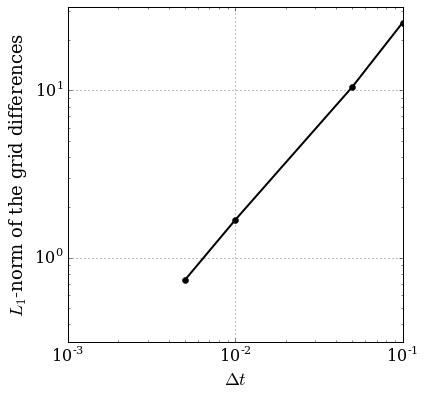

In [12]:
# log-log plot of the grid differences
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=18)
pyplot.ylabel('$L_1$-norm of the grid differences', fontsize=18)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color='k', ls='-', lw=2, marker='o');

### Порядок сходимости

Порядок сходимости это скорость, с которой численное решение приближается к точному по мере измельчения расчетной сетки. Учитывая, что мы не сраниваемся с точным решением, воспользуется последовательностью из 3 сеток, которые измельчаются с коэффициентом $r$, для того чтобы найти *наблюдаемый порядок схоимости* ($p$) по формуле:
$$
\begin{equation}
p = \frac{\log \left(\frac{f_3-f_2}{f_2-f_1} \right) }{\log(r)}
\end{equation}
$$

где $f_1$ — решение на подробной сетке, а $f_3$ — на грубой.  

In [13]:
r = 2
h = 0.001

dt_values2 = numpy.array([h, r*h, r**2*h])

u_values2 = numpy.empty_like(dt_values2, dtype=numpy.ndarray)

diffgrid2 = numpy.empty(2)

for i, dt in enumerate(dt_values2):
    
    N = int(T/dt) + 1   # number of time-steps
    
    ### discretize the time t ###
    t = numpy.linspace(0.0, T, N)
    
    # initialize the array containing the solution for each time-step
    u = numpy.empty((N, 4))
    u[0] = numpy.array([v0, theta0, x0, y0])

    # time loop
    for n in range(N-1):

        u[n+1] = euler_step(u[n], f, dt)         ### call euler_step() ###
    
    # store the value of u related to one grid
    u_values2[i] = u
    

#calculate f2 - f1
diffgrid2[0] = get_diffgrid(u_values2[1], u_values2[0], dt_values2[1])

#calculate f3 - f2
diffgrid2[1] = get_diffgrid(u_values2[2], u_values2[1], dt_values2[2])

# calculate the order of convergence
p = (log(diffgrid2[1]) - log(diffgrid2[0])) / log(r)

print('The order of convergence is p = {:.3f}'.format(p));

The order of convergence is p = 1.014


Видите, как близок полученный порядок сходимости к 1? Это означает, что скорость убывания сеточной разницы совпадает с коэффициентом измельчения сетки. Метод Эйлера — метод первого порядка, и полученный нами результат подтверждает это.

# Бумажный самолетик

Представьте, что вы участвуете в соревновании на дальность полета бумажного самолетика. Воспользуйтесь полученными знаниями по теории фугоидного движения для того, чтобы повысить свои шансы на победу. Для заданного значения аэродинамического качества (оно зависит от модели самолета) и высоты запуска нужно определить, с какой скоростью и под каким углом нужно запустить самолетик, чтобы он пролетел максимальное расстояние.

Используя разработанную модель фугоида, напишите программу для анализа полета бумажного самолетика со следующими условиями:


*  Качество $L/D = 5.0$ (величина близка к данным статьи Feng et al. 2009)
*  Для триммерной скорости используйте значение 4.9 м/с (примерно среднне значение скорости полета из той же работы)
*  Определите оптимальный угол и скорость запуска
*  Продумайте условие остановки расчета
*  Как проверить реалистичность полученных результатов?

## Использованные источники

* Feng, N. B. et al. _"On the aerodynamics of paper airplanes"_, AIAA paper 2009-3958, 27th AIAA Applied Aerodynamics Conference, San Antonio, TX. [PDF](http://arc.aiaa.org/doi/abs/10.2514/6.2009-3958)

* Simanca, S. R. and Sutherland, S. _"Mathematical problem-solving with computers,"_ 2002 course notes, Stony Brook University, chapter 3: [The Art of Phugoid](https://www.math.sunysb.edu/~scott/Book331/Art_Phugoid.html). (Note that there is an error in the figure: sine and cosine are switched.)

---

###### The cell below loads the style of the notebook.

In [14]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())